<a href="https://colab.research.google.com/github/Abhii2404/6thSem-ML-Lab/blob/main/1BM22CS006_Lab_10_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

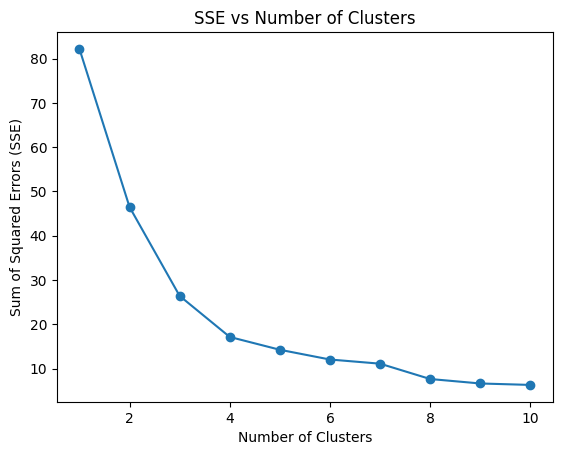

Predicted Clusters for Test Data: [0 1 0 0 2 0 2 2 2 2]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Step 1: Create a CSV file "income.csv" with Name, Age, and Income for 50 rows
data = {
    'Name': [f'Person_{i+1}' for i in range(50)],
    'Age': np.random.randint(18, 70, size=50),
    'Income': np.random.randint(20000, 120000, size=50)
}

df = pd.DataFrame(data)

# Save the dataframe to a CSV file
df.to_csv('income.csv', index=False)

# Step 2: Load the CSV file
df = pd.read_csv('income.csv')

# Step 3: Extract features (Age and Income) for clustering
X = df[['Age', 'Income']]

# Step 4: Perform feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the data into 80% training and 20% testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Step 6: Plot SSE vs. Number of clusters (Elbow Method) to determine the optimal number of clusters
sse = []
k_range = range(1, 11)  # Test for number of clusters from 1 to 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.title('SSE vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Step 7: Build the KMeans model with the optimal number of clusters (let's choose k=3 after looking at the elbow plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)

# Step 8: Predict the clusters for the test data
y_pred = kmeans.predict(X_test)

# Step 9: Evaluate the accuracy (since KMeans is an unsupervised algorithm, we usually don't have labels for accuracy).
# We can compare cluster assignments between training and testing datasets if we had labels,
# but typically for clustering, we focus on cluster quality or silhouette score rather than accuracy.

print(f'Predicted Clusters for Test Data: {y_pred}')


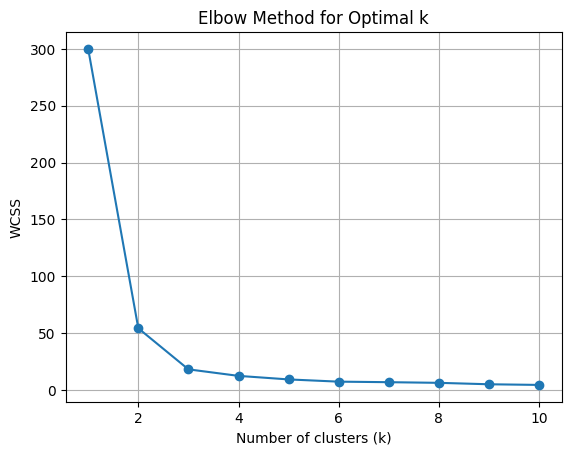

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load data
iris = load_iris()
X = iris.data[:, 2:4]  # petal length and width

# 2. Preprocess: Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Elbow method to find optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# 4. Plot
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
